# LAB8 - TinyML

Przedmiot: Sztuczna Inteligencja w Systemach Informatycznych

Autor: Tomasz Szydło

kontakt: tszydlo@agh.edu.pl


# Wprowadzenie

Celem zajęć jest zaznajomienie się z podstawowymi zagadnieniami związanymi z TinyML. W ramach zajęć zostanie opracowany model klasyfikatora dla urządzenia zbudowanego z wykorzystaniem płytki Arduino. W trakcie zajęć laboratoryjnych zostanie wykorzystany zbiór danych Irys, a do klasyfikacji wykorzystane będą lasy drzew decyzyjnych.

Środowisko pracy: Anaconda, Jupyter Notebook, WOKWI

Narzędzia: Scikit Learn, Python, C, Arduino

# Projekt Arduino

Urządzenie zbudowane z wykorzystaniem płytki Arduino będzie służyło do klasyfikacji kwiatów Irysów. Pomiar długości i szerokości płatków Irysów będzie dokonywany za pomocą potencjometrów suwakowych podłączonych do wejść analogowych Arduino (wejścia A0 - A3). Na wyświetlaczu LCD (podłączonym przez I2C) wskazywana będzie rozpoznana klasa.

Projekt będzie testowany na platformie [wokwi.com](wokwi.com), gdzie należy założyć konto, a następnie wybrać pusty projekt dla płytki Arduino Mega.

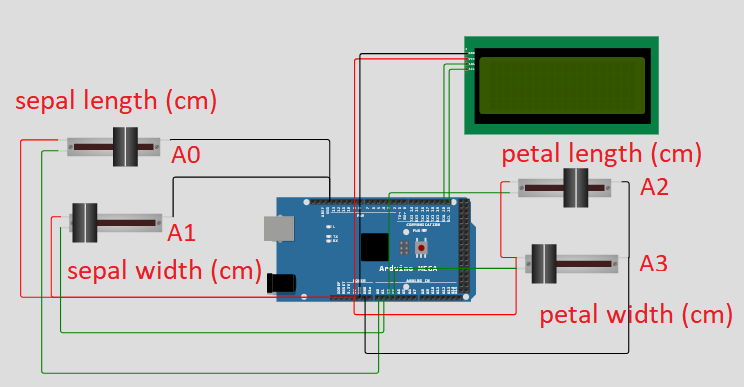

# Przetwarzanie danych na Arduino

*   Wiring wszystkich potrzenych komponentów urządzenia.
*   Przygotowanie wstępnego programu na podstawie plików pomocniczych do laboratorium.

*   Inicjalizacja urządzenia i podłączonego wyświetlacza.
*   Skalowanie wartości odczytanych z potencjometrów suwakowych tak by odpowiadały przedziałowi poszczególnych cech wejściowych.
*   Wypisywanie na porcie szeregowych wektora cech i jego wizualiacja na wykresie.
*   Opracowanie klasyfikatora z wykorzystaniem biblioteki FogML i przeniesienie kodu na Arudino.
*   Wyświtlanie rozpoznanej klasy.

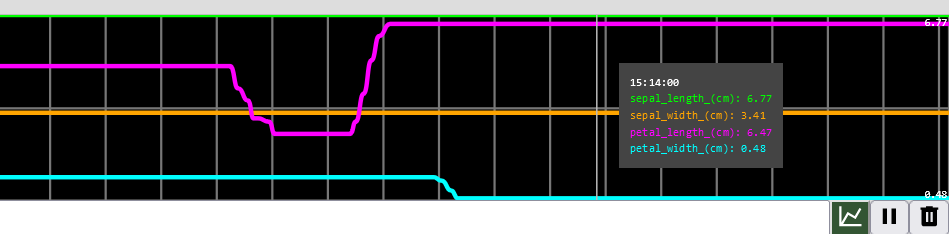


# FogML

Biblioteka FogML służy do m.in. do generowania kodu źródłowego modeli ML dla urządzeń o ograniczonych zasobach.

Więcej informacji o biblitece w repozytorium Github - [FogML](https://github.com/tszydlo/FogML).

In [1]:
!pip install fogml

W urządzeniu wykorzystny zostanie klasyfikator opracowanych z wykorzystaniem lasu drzew decyzyjnych (`RandomForestClassifier`) złożonym z 5 słabych estymatorów. Proces uczenia jest uproszczony na potrzeby zajęć.

In [2]:
from sklearn import datasets, tree
from sklearn.ensemble import RandomForestClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = RandomForestClassifier(n_estimators = 5)

clf.fit(X, y)

print( 'accuracy: ',clf.score(X,y))

accuracy:  0.9866666666666667


# Skalowanie danych z czujników



W Arduino przetworniki ADC mają rozdzielczość 10bit i w domyślnej konfiguracji działają dla zakresu 0-5V.

Dane z czujników (potencjometró) należy tak przeskalować aby dla każdego z elementów wektora cech uzyskiwane wartości były w przedziale `[min;max]` odpowiadającym przedziałowi cech ze zbioru treningowego.

In [3]:
def min_max(test_list): 
    min_max_columns = []
    
    for i in range(4):
        min_max_columns.append((test_list[:, i].min(), test_list[:, i].max()))
    
    return min_max_columns

print(iris.feature_names)
print(min_max(X))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[(4.3, 7.9), (2.0, 4.4), (1.0, 6.9), (0.1, 2.5)]


Wygeneruj kod klasyfikatora w języku C, a następnie wygenerowany plik z kodem źródłowym przenieś do projektu dla Arduino.

In [4]:
from fogml.generators import GeneratorFactory

factory = GeneratorFactory()

generator = factory.get_generator(clf)

generator.generate()

Wygeneruj tablicę zawierającą nazwy klas wynikowych i umieść ja w kodzie programu dla Arduino.

In [5]:
class_names = ["setosa", "versicolor", "virginica"]
string_format = "char* classes[] = {{{}}};"

joined = ', '.join(['"' + class_name + '"' for class_name in class_names])

print(string_format.format(joined))

char* classes[] = {"setosa", "versicolor", "virginica"};


# Podsumowanie

Ostatnim etapem jest przetestowanie działanie urządzenia dla różnych przykładowych danych wejściowych skutkujących klasyfikacją kwiatów Irysów.

W kolejnej komórce należy umieścić zrzut ekranu na którym przedstawiony będzie wiring oraz rozpoznana klasa `virginica`.

<img src="wiring_virginica.jpg" width=800 height=800 />